# EDA 및 가설을 바탕으로 데이터 확인 및 전처리 진행

* categories를 새롭게 카테고라이징 후 카테고리별 유저의 별점 평균 및 데이터 수 확인

* 시계열 관점에서 가게의 기간별 리뷰 데이터 수 확인 및 기간 범위, 간격 설정

## drive mount & dataset open



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install polars

In [ ]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
review_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_review.json")

In [ ]:
user_df = pl.read_ndjson("/content/drive/MyDrive/ASAC 5기/woowahan/dataset/yelp_academic_dataset_user.json")

In [ ]:
biz_add_cat = pd.read_excel('/content/drive/MyDrive/ASAC 5기/woowahan/dataset/business_add_main_sub.xlsx')

### review df open & sampling

In [ ]:
review_df.head()

review_id,user_id,business_id,stars,useful,funny,cool,text,date
str,str,str,f64,i64,i64,i64,str,str
"""KU_O5udG6zpxOg…","""mh_-eMZ6K5RLWh…","""XQfwVwDr-v0ZS3…",3.0,0,0,0,"""If you decide …","""2018-07-07 22:…"
"""BiTunyQ73aT9WB…","""OyoGAe7OKpv6Sy…","""7ATYjTIgM3jUlt…",5.0,1,0,1,"""I've taken a l…","""2012-01-03 15:…"
"""saUsX_uimxRlCV…","""8g_iMtfSiwikVn…","""YjUWPpI6HXG530…",3.0,0,0,0,"""Family diner. …","""2014-02-05 20:…"
"""AqPFMleE6RsU23…","""_7bHUi9Uuf5__H…","""kxX2SOes4o-D3Z…",5.0,1,0,1,"""Wow! Yummy, d…","""2015-01-04 00:…"
"""Sx8TMOWLNuJBWe…","""bcjbaE6dDog4jk…","""e4Vwtrqf-wpJfw…",4.0,1,0,1,"""Cute interior …","""2017-01-14 20:…"


In [ ]:
review_df.shape

(6990280, 9)

In [ ]:
review_df = review_df.to_pandas()

In [ ]:
review_sample_df = review_df.sample(n=300000, random_state=42, replace = True)
print(review_sample_df.shape)
review_sample_df

(300000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
6413414,uA4z3VILi_g2lfY7bdBYIA,Pbj2wcGMJ-3s6E0bdnx8aQ,tSRICEpYkNZyeCyHYMsM7w,5.0,1,0,0,"Joey has been cutting my hair for years, does ...",2016-02-26 19:51:20
6962611,mdlCRQChrdhE87TPq8y-tw,rpTVjnG1qz403EYYsAlm2Q,VbzoVWEPSfzaIGBq4KlVwQ,4.0,0,0,0,i just discovered this place and have been com...,2021-11-12 13:59:50
6423388,bvy3W0AGzGJxxhWzOS7v-w,z1yqatRh9eSo1Xl99w3SjQ,-1B9pP_CrRBJYPICE5WbRA,3.0,0,0,0,"Went to Spyce 28 for dinner this past Sunday, ...",2018-06-13 17:57:58
6550634,t4qvPLAF5Yjs3KfoFlbMGA,O6uORP9Q_AYHomJBPWxIMA,hvp1huVLVB7reZZKeXvhpg,4.0,0,0,0,Its a BYOB Tiki Bar. I can't wait to return wi...,2014-06-03 03:02:57
1692743,wLI8dgnvYlx4EjVcHV0fGg,DYJ2s7mvC2xHWVqzmraNlQ,I7SkoqN88fpKagzKA059Fw,5.0,0,0,0,This my second visit to First Watch. I have n...,2017-12-23 15:43:23
...,...,...,...,...,...,...,...,...,...
966408,Jhmip1A5IvAIYOZl_AJnLg,6ObFF8-uKnOAlXuSH4TlyQ,UUP-DfmhHVGXMyKjzgKiSw,4.0,8,0,5,This restaurant is a pleasant surprise in more...,2014-04-29 01:43:39
3347797,8mDtI6V0PfQ-294IycEKLg,dIRwsqLeLmN1O5Xrxvi-pA,eQ9eDKIuSF6e5ol9fZLq0g,5.0,2,0,1,This review is for Reno Central (Mill Street) ...,2020-01-08 18:48:18
1658392,oCs9NDMnGIi6r7tTsobaRw,-4l0KvHJccdfE9-wRGoAAA,qb28j-FNX1_6xm7u372TZA,5.0,0,0,0,The Gumbo Shop is one of the best places to ea...,2017-05-06 19:19:57
6658126,EJE59gtQ21GtnfT7agSm0A,3sHsM8TILb3gnq9J06QzxQ,3gVSrS4kffGGZT8oXHsIcw,4.0,0,0,0,2nd time we were here. Great atmosphere. Waite...,2013-09-02 17:07:40


### user df open

In [ ]:
user_df

user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
str,str,i64,str,i64,i64,i64,str,str,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""qVc8ODYU5SZjKX…","""Walker""",585,"""2007-01-25 16:…",7217,1259,5994,"""2007""","""NSCy54eWehBJyZ…",267,3.91,250,65,55,56,18,232,844,467,467,239,180
"""j14WgRoU_-2ZE1…","""Daniel""",4333,"""2009-01-25 04:…",43091,13066,27281,"""2009,2010,2011…","""ueRPE0CX75ePGM…",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
"""2WnXYQFK0hXEoT…","""Steph""",665,"""2008-07-25 10:…",2086,1010,1003,"""2009,2010,2011…","""LuO3Bn4f3rlhyH…",52,3.32,89,13,10,17,3,66,96,119,119,35,18
"""SZDeASXq7o05mM…","""Gwen""",224,"""2005-11-29 04:…",512,330,299,"""2009,2010,2011…","""enx1vVPnfdNUdP…",28,4.27,24,4,1,6,2,12,16,26,26,10,9
"""hA5lMy-EnncsH4…","""Karen""",79,"""2007-01-05 19:…",29,15,7,"""""","""PBK4q9KEEBHhFv…",1,3.54,1,1,0,0,0,1,1,0,0,0,0
"""q_QQ5kBBwlCcbL…","""Jane""",1221,"""2005-03-14 20:…",14953,9940,11211,"""2006,2007,2008…","""xBDpTUbai0DXrv…",1357,3.85,1713,163,191,361,147,1212,5696,2543,2543,815,323
"""cxuxXkcihfCbqt…","""Rob""",12,"""2009-02-24 03:…",6,1,0,"""""","""HDAQ74AEznP-Ys…",1,2.75,0,0,0,0,0,0,1,0,0,0,0
"""E9kcWJdJUHuTKf…","""Mike""",358,"""2008-12-11 22:…",399,102,143,"""""","""y2GyxJF5VQWohx…",23,3.73,4,7,2,0,0,8,6,12,12,5,0
"""lO1iq-f75hnPNZ…","""Rachelle""",40,"""2008-12-29 22:…",109,40,46,"""""","""tOQDlz36rI__SO…",7,4.04,2,0,0,3,0,3,4,5,5,3,1


In [ ]:
user_df=user_df.to_pandas()

### biz add main sub open

In [ ]:
biz_add_cat

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,is_open,attributes,categories,hours,main1,main2,main1_sub1,main1_sub2,main2_sub1,main2_sub2
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,...,0,{'ByAppointmentOnly': 'True'},"['Doctors', 'Traditional Chinese Medicine', 'N...",NaN,Health & Medical,NaN,Doctors,Traditional Chinese Medicine,NaN,NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,...,1,{'BusinessAcceptsCreditCards': 'True'},"['Shipping Centers', 'Local Services', 'Notari...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Local Services,NaN,Shipping Centers,Notaries,NaN,NaN
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,...,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","['Department Stores', 'Shopping', 'Fashion', '...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Shopping,NaN,Fashion,Home & Garden,NaN,NaN
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,...,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","['Restaurants', 'Food', 'Bubble Tea', 'Coffee ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",Restaurants,Food,NaN,NaN,Bubble Tea,Coffee & Tea
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,...,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","['Brewpubs', 'Breweries', 'Food']","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",Food,NaN,Breweries,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150238,150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,...,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","['Nail Salons', 'Beauty & Spas']","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...",Beauty & Spas,NaN,Nail Salons,NaN,NaN,NaN
150239,150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,...,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","['Pets', 'Nurseries & Gardening', 'Pet Stores'...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...",Pets,Shopping,Pet Stores,NaN,Hobby Shops,Home & Garden
150240,150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,...,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","['Shopping', 'Jewelry', 'Piercing', 'Toy Store...",NaN,Shopping,Beauty & Spas,Jewelry,Toy Stores,Piercing,NaN
150241,150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,...,1,"{'BusinessParking': ""{'garage': False, 'street...","['Fitness/Exercise Equipment', 'Eyewear & Opti...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",Shopping,NaN,Fitness/Exercise Equipment,Eyewear & Opticians,NaN,NaN


In [ ]:
# 특정 열 선택
biz_df_pick = biz_add_cat[['business_id', 'categories', 'stars', 'main1', 'main1_sub1']]

# 'stars' 컬럼명을 'stars_biz'로 변경
biz_df_pick.rename(columns={'stars': 'stars_biz', 'main1' : 'main_category_biz', 'main1_sub1' : 'sub_category_biz'}, inplace=True)

<ipython-input-13-2fb347036f96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  biz_df_pick.rename(columns={'stars': 'stars_biz', 'main1' : 'main_category_biz', 'main1_sub1' : 'sub_category_biz'}, inplace=True)


In [ ]:
biz_df_pick

,business_id,categories,stars_biz,main_category_biz,sub_category_biz
0,Pns2l4eNsfO8kk83dixA6A,"['Doctors', 'Traditional Chinese Medicine', 'N...",5.0,Health & Medical,Doctors
1,mpf3x-BjTdTEA3yCZrAYPw,"['Shipping Centers', 'Local Services', 'Notari...",3.0,Local Services,Shipping Centers
2,tUFrWirKiKi_TAnsVWINQQ,"['Department Stores', 'Shopping', 'Fashion', '...",3.5,Shopping,Fashion
3,MTSW4McQd7CbVtyjqoe9mw,"['Restaurants', 'Food', 'Bubble Tea', 'Coffee ...",4.0,Restaurants,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,"['Brewpubs', 'Breweries', 'Food']",4.5,Food,Breweries
...,...,...,...,...,...
150238,IUQopTMmYQG-qRtBk-8QnA,"['Nail Salons', 'Beauty & Spas']",3.0,Beauty & Spas,Nail Salons
150239,c8GjPIOTGVmIemT7j5_SyQ,"['Pets', 'Nurseries & Gardening', 'Pet Stores'...",4.0,Pets,Pet Stores
150240,_QAMST-NrQobXduilWEqSw,"['Shopping', 'Jewelry', 'Piercing', 'Toy Store...",3.5,Shopping,Jewelry
150241,mtGm22y5c2UHNXDFAjaPNw,"['Fitness/Exercise Equipment', 'Eyewear & Opti...",4.0,Shopping,Fitness/Exercise Equipment


##table join

### review_sample join biz_df_pick

In [ ]:
# business_id를 기준으로 review_sample_df와 biz_df_pick를 조인
merged_biz_rev_df = pd.merge(biz_df_pick, review_df, on='business_id', how='inner')

# 결과 확인
merged_biz_rev_df

,business_id,categories,stars_biz,main_category_biz,sub_category_biz,review_id,user_id,stars,useful,funny,cool,text,date
0,Pns2l4eNsfO8kk83dixA6A,"['Doctors', 'Traditional Chinese Medicine', 'N...",5.0,Health & Medical,Doctors,9vwYDBVI3ymdqcyJ5WW2Tg,e0imecnX_9MtLnS2rUZM-A,5.0,3,2,1,I've had acupuncture treatments with Abby over...,2012-05-02 18:07:38
1,Pns2l4eNsfO8kk83dixA6A,"['Doctors', 'Traditional Chinese Medicine', 'N...",5.0,Health & Medical,Doctors,OXgg1LdxHDv3CBU5-xi2lA,_Q0fdLVoTnlNkEypUvNkHA,5.0,1,0,0,Abby is an amazing practitioner. In a treatmen...,2013-03-01 06:11:05
2,Pns2l4eNsfO8kk83dixA6A,"['Doctors', 'Traditional Chinese Medicine', 'N...",5.0,Health & Medical,Doctors,DG64cjud9cWB4fANskVxSw,ycUooVIDWPgXPf6niW-FWQ,4.0,2,0,0,I went to see Abby for some digestive issues. ...,2013-01-17 00:05:43
3,Pns2l4eNsfO8kk83dixA6A,"['Doctors', 'Traditional Chinese Medicine', 'N...",5.0,Health & Medical,Doctors,hzvRRb40oPttxAdyr7kfow,CiwVvb7jWijWB5jkmatzKA,5.0,0,1,0,"Abby helped me with some longstanding issues, ...",2015-03-16 03:43:08
4,Pns2l4eNsfO8kk83dixA6A,"['Doctors', 'Traditional Chinese Medicine', 'N...",5.0,Health & Medical,Doctors,xUkBPk-QfcW4i3MRU5TeXw,QkCbMKBktkrkOFJugHvY6w,5.0,0,0,0,"Recently, I referred a patient of mine with mu...",2013-03-05 18:45:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989586,jV_XOycEzSlTx-65W906pg,"['Beauty & Spas', 'Permanent Makeup', 'Piercin...",4.5,Beauty & Spas,Permanent Makeup,b4lUxYu-8yBkq8H4NgzS2A,EYKtdSmIb48URxUagC937A,5.0,0,0,0,It is with my greatest pleasure to say that I'...,2017-10-31 02:29:12
6989587,jV_XOycEzSlTx-65W906pg,"['Beauty & Spas', 'Permanent Makeup', 'Piercin...",4.5,Beauty & Spas,Permanent Makeup,5gE7ACSqGdQSaiS75Nl_tw,T-tMouhG-faaEyh2zpprYg,5.0,0,0,0,I went there to get my nose piercing replaced....,2021-07-29 21:11:02
6989588,jV_XOycEzSlTx-65W906pg,"['Beauty & Spas', 'Permanent Makeup', 'Piercin...",4.5,Beauty & Spas,Permanent Makeup,34FBVC0N2M-7r2aCZnXecA,r_xuBblpy45w9lPHUwQFtA,5.0,0,0,0,Fantastic tattoo artist. Friendly and talkativ...,2019-08-26 05:44:13
6989589,jV_XOycEzSlTx-65W906pg,"['Beauty & Spas', 'Permanent Makeup', 'Piercin...",4.5,Beauty & Spas,Permanent Makeup,VSMXMQ8qOauSGS4sC_4XHQ,wZw_sEDCvTxV9Zc4ftHb5w,5.0,1,0,1,"Please note, this studio has relocated to Apol...",2020-02-10 00:30:15


###user df join biz & review

In [ ]:
# user_id를 기준으로 review_sample_df와 user_df를 조인
merged_user_biz_rev_df = pd.merge(user_df, merged_biz_rev_df, on='user_id', how='inner')

# 결과 확인
merged_user_biz_rev_df

,user_id,name,review_count,yelping_since,useful_x,funny_x,cool_x,elite,friends,fans,...,stars_biz,main_category_biz,sub_category_biz,review_id,stars,useful_y,funny_y,cool_y,text,date
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,4.5,Restaurants,American (Traditional),Egy2a4qZeXGr2aY6KMxxbg,5.0,0,0,1,Remarkable food with beach access for the whol...,2017-05-09 23:21:36
1,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,4.0,Public Services & Government,NaN,01vN0q6aMlFio6HAjLZz7Q,5.0,30,7,32,I loved everything about this lovely train sta...,2009-05-01 02:00:03
2,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,4.0,Arts & Entertainment,Museums,hN09L9s9vu0kgUBESDmszQ,4.0,2,1,2,"The classic facade, built over an earlier faci...",2017-05-11 19:17:55
3,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,3.0,Hotels & Travel,Hotels,Pn2_64tysqn4dUNmu1B8Iw,2.0,4,0,0,Older Residence Inn with air conditioner probl...,2014-07-30 15:07:43
4,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,3.0,Food,Grocery,-ofc7qq3ooCkbcnG_aXQ4w,2.0,1,0,0,GrubHub delivered quickly. Greek salad was not...,2021-04-30 01:16:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989553,fB3jbHi3m0L2KgGOxBv6uw,Jerrold,23,2015-01-06 00:31:31,7,0,0,,None,0,...,4.0,Restaurants,Latin American,uO_RZtC2xzUQjUlkj04Dkw,5.0,0,0,0,Amazing. Great food and great service. Our wai...,2018-02-27 02:09:23
6989554,68czcr4BxJyMQ9cJBm6C7Q,Jane,1,2016-06-14 07:20:52,0,0,0,,None,0,...,5.0,Food,Tea Rooms,V23VBkOopUO8rv51MhXGjA,5.0,0,0,0,"Friendly, welcoming place to spend a few hours...",2019-07-05 20:34:24
6989555,1x3KMskYxOuJCjRz70xOqQ,Shomari,4,2017-02-04 15:31:58,1,1,0,,None,0,...,4.0,Restaurants,Steakhouses,k4tfnbNYIu4tfBFPGeU-lA,5.0,1,0,0,In town to celebrate my wife's birthday with f...,2017-02-05 07:05:21
6989556,ulfGl4tdbrH05xKzh5lnog,Susanne,2,2011-01-14 00:29:08,0,0,0,,None,0,...,3.0,Food,Convenience Stores,GDqGJRBPXg0Mpxoa6K97MQ,1.0,0,0,0,Employees not wearing masks. Same for 90% of t...,2020-05-10 18:38:38


## ★ 가설. 유저의 선호도에 따른 평점 평균에 차이가 있을 것이다.

* ex) 유저가 좋아하는 음식에는 엄격한 기준 적용, 그렇지 않으면 후한 점수 부여 등

[1차 EDA]

■ 데이터셋 확인 : 리뷰를 가장 많이 작성한 유저를 확인한 결과, 카테고리별 별점 평균에 차이가 있었음.

▶ 리뷰어의 해당 카테고리 평균 점수를 같이 제공하면 어떨까?

[2차 EDA]

■ 데이터셋 확인 : yelp에서 제공한 json을 바탕으로 main/sub 카테고리를 추출하였고(1만 사용), 이를 기준으로 별점 평균의 차이 확인, 리뷰를 가장 많이 작성한 10명의 유저의 sub 카테고리별 별점 평균 확인

▶ 결론

 *리뷰 수 상위 12명의 카테고리별 평점을 보았을 때 두드러지는 차이를 보이는 유저는 없었음. 다만, 사람에 따라 최저점과 최고점의 차이가 있어서 이를 이용해서 리뷰어의 특성을 보여줘도 좋을듯.*



In [ ]:
## 카테고리 유니크 확인
merged_user_biz_rev_df['main_category_biz'].value_counts()

main_category_biz
Restaurants                     3322023
Food                             916994
Nightlife                        662666
Shopping                         314953
Beauty & Spas                    300299
Event Planning & Services        234494
Automotive                       204410
Home Services                    163331
Hotels & Travel                  155137
Health & Medical                 142392
Arts & Entertainment             136625
Active Life                      127120
Local Services                   111303
Pets                              72434
Local Flavor                      42731
Professional Services             27058
Public Services & Government      19615
Education                         15799
Financial Services                15044
Religious Organizations            3416
Mass Media                         1692
Bicycles                             22
Name: count, dtype: int64

In [ ]:
merged_user_biz_rev_df['sub_category_biz'].value_counts()


sub_category_biz
Bars                      593148
American (Traditional)    245512
American (New)            236224
Mexican                   222449
Breakfast & Brunch        186917
                           ...  
Mosques                        5
Town Hall                      5
Ice Delivery                   5
Bus Rental                     5
Solar Panel Cleaning           5
Name: count, Length: 782, dtype: int64

##### 전체 유저의 카테고리별 별점 평균

In [ ]:
# 메인 카테고리별 별점 평균 및 리뷰 수 계산
main_category_stats = merged_user_biz_rev_df.groupby('main_category_biz').agg({
    'stars': 'mean',
    'review_id': 'count'
}).reset_index().rename(columns={'stars': 'average_stars', 'review_id': 'review_count'})

# 서브 카테고리별 별점 평균 및 리뷰 수 계산
sub_category_stats = merged_user_biz_rev_df.groupby('sub_category_biz').agg({
    'stars': 'mean',
    'review_id': 'count'
}).reset_index().rename(columns={'stars': 'average_stars', 'review_id': 'review_count'})


<ipython-input-20-bc5b3d450699>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(main_category_stats['main_category_biz'], rotation=45, ha='right')


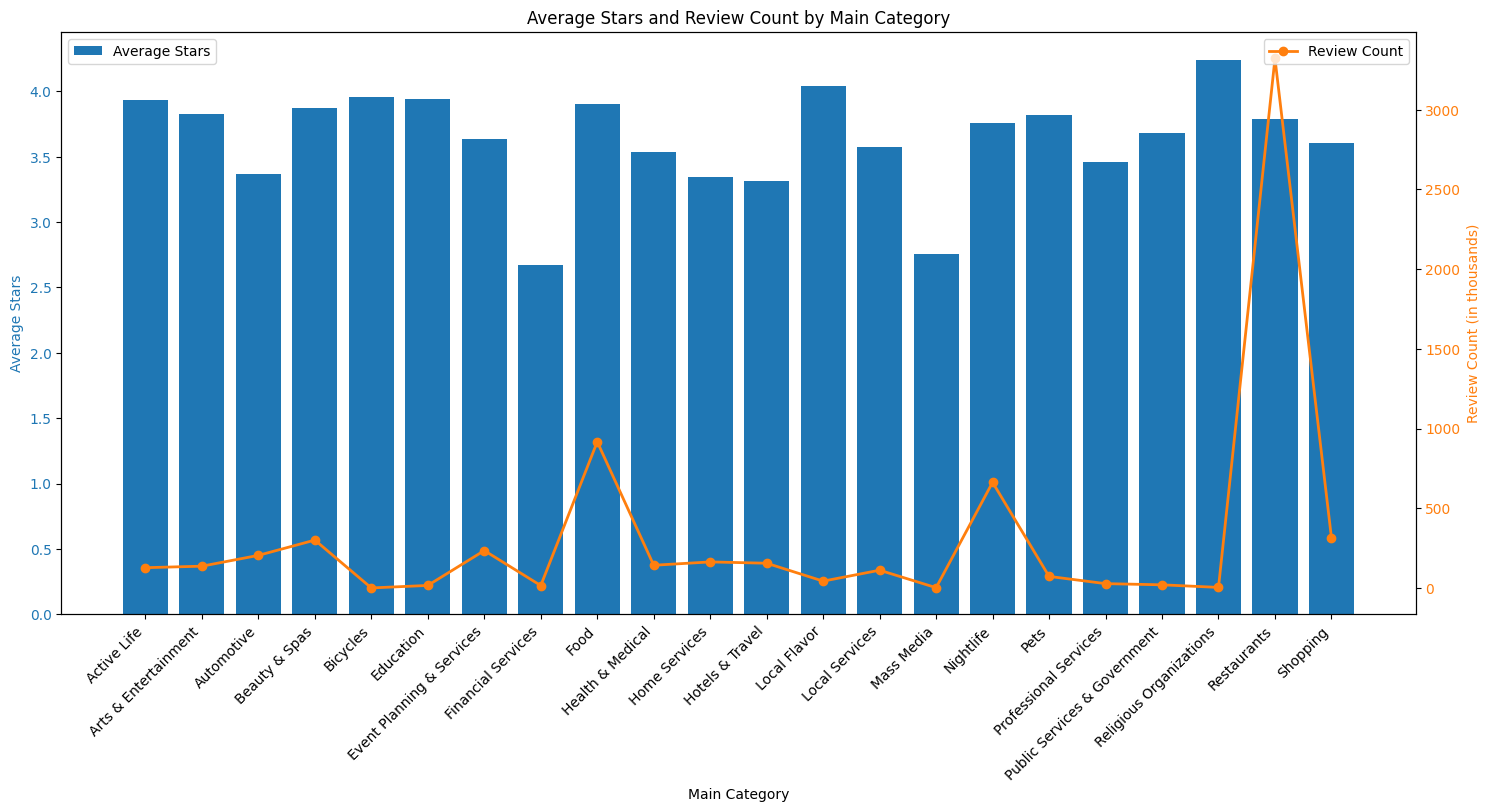

In [ ]:
# 메인 카테고리별 별점 평균 및 리뷰 수 바 차트와 꺾은선 그래프
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Main Category')
ax1.set_ylabel('Average Stars', color=color)
bars = ax1.bar(main_category_stats['main_category_biz'], main_category_stats['average_stars'], color=color, label='Average Stars')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Review Count (in thousands)', color=color)
ax2.plot(main_category_stats['main_category_biz'], main_category_stats['review_count'] / 1000, color=color, marker='o', linestyle='-', linewidth=2, label='Review Count')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# x축 레이블 회전 설정
ax1.set_xticklabels(main_category_stats['main_category_biz'], rotation=45, ha='right')

fig.tight_layout()
plt.title('Average Stars and Review Count by Main Category')
plt.show()

In [ ]:
# 상위 N개의 서브 카테고리만 선택 (예: 상위 10개)
top_n = 20
top_sub_category_stats = sub_category_stats.nlargest(top_n, 'review_count')

<ipython-input-22-353ea078bd9a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_sub_category_stats['sub_category_biz'], rotation=45, ha='right')


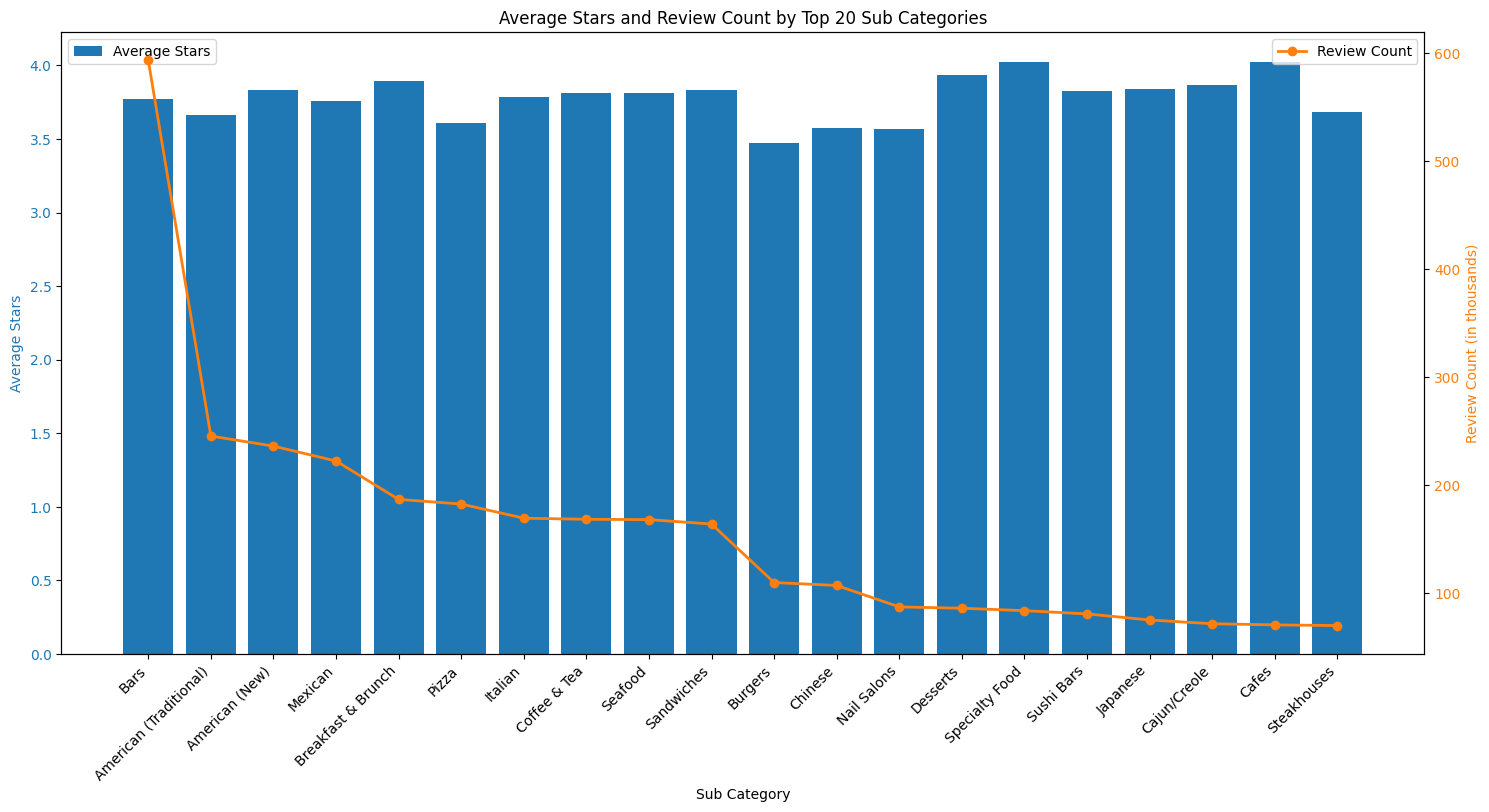

In [ ]:
# 상위 N개의 서브 카테고리별 별점 평균 및 리뷰 수 바 차트와 꺾은선 그래프
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Sub Category')
ax1.set_ylabel('Average Stars', color=color)
bars = ax1.bar(top_sub_category_stats['sub_category_biz'], top_sub_category_stats['average_stars'], color=color, label='Average Stars')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Review Count (in thousands)', color=color)
ax2.plot(top_sub_category_stats['sub_category_biz'], top_sub_category_stats['review_count'] / 1000, color=color, marker='o', linestyle='-', linewidth=2, label='Review Count')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

# x축 레이블 회전 설정
ax1.set_xticklabels(top_sub_category_stats['sub_category_biz'], rotation=45, ha='right')

fig.tight_layout()
plt.title(f'Average Stars and Review Count by Top {top_n} Sub Categories')
plt.show()

##### 리뷰가 가장 많은 유저 10명의 카테고리별 평점 확인

In [ ]:
# 리뷰어별 리뷰 수 계산하고 상위 10명 선택
top_reviewers = merged_user_biz_rev_df['user_id'].value_counts().nlargest(12).index

# 상위 10명의 리뷰어 데이터 필터링
top_reviewer_data = merged_user_biz_rev_df[merged_user_biz_rev_df['user_id'].isin(top_reviewers)]


In [ ]:
# 상위 N개의 서브 카테고리만 선택 (예: 상위 10개)
top_n = 15
top_sub_category_stats = sub_category_stats.nlargest(top_n, 'review_count')

<ipython-input-25-c63576630ce4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category_avg_stars['sub_category_biz'], rotation=45, ha='right')
<ipython-input-25-c63576630ce4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category_avg_stars['sub_category_biz'], rotation=45, ha='right')
<ipython-input-25-c63576630ce4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category_avg_stars['sub_category_biz'], rotation=45, ha='right')
<ipython-input-25-c63576630ce4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category_avg_stars['sub_category_biz'], rotation=45, ha='right')
<ipython-input-25-c63576630ce4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(category_avg_stars['sub_category_biz'], rotation=45, ha='right')
<ipython-input-

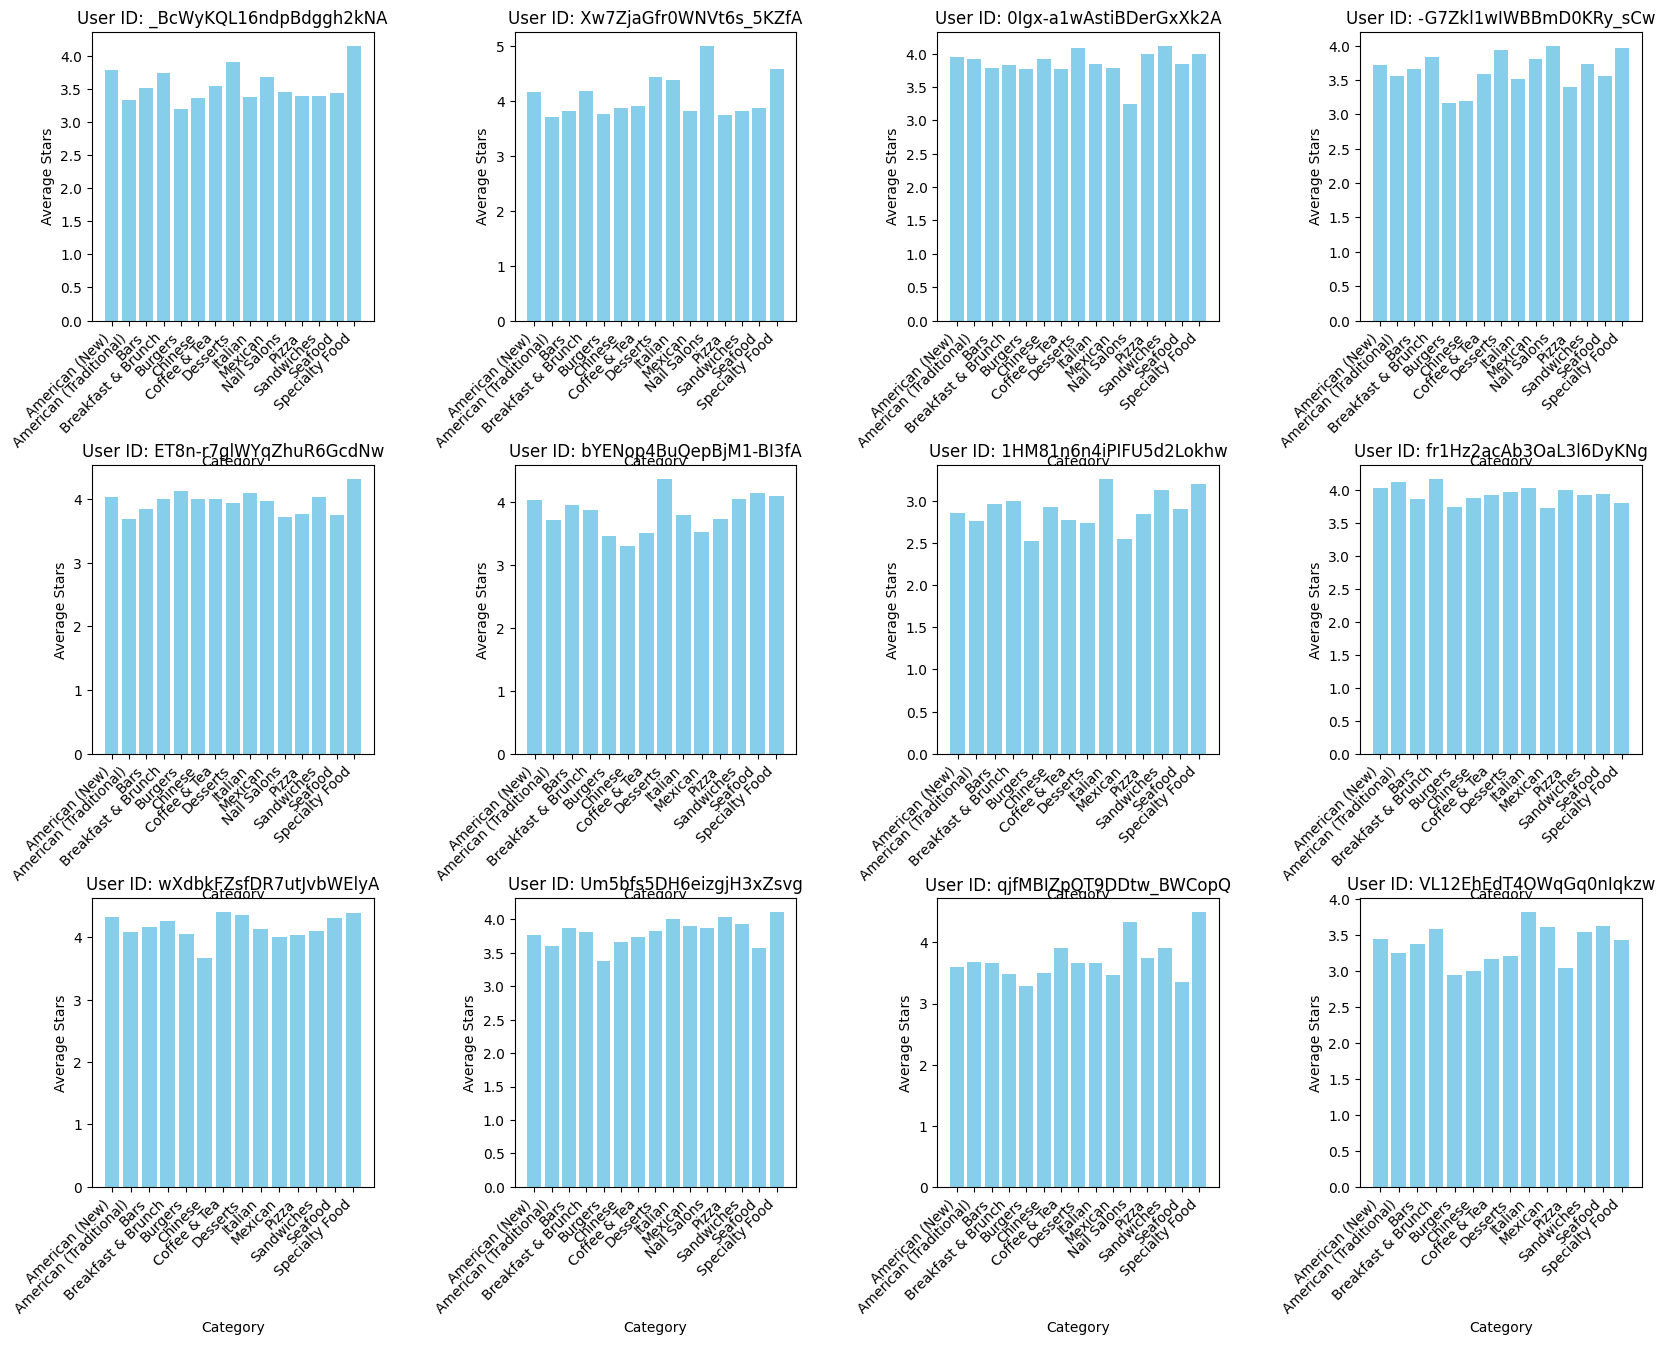

In [ ]:
# 필터링된 서브 카테고리만 포함하는 데이터
filtered_top_reviewer_data = top_reviewer_data[top_reviewer_data['sub_category_biz'].isin(top_sub_category_stats['sub_category_biz'])]

# 2행 3열의 서브플롯 생성
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# 각 리뷰어별 카테고리별 평균 평점을 계산하고 시각화
for i, user_id in enumerate(top_reviewers):
    user_data = filtered_top_reviewer_data[filtered_top_reviewer_data['user_id'] == user_id]
    category_avg_stars = user_data.groupby('sub_category_biz')['stars'].mean().reset_index()

    ax = axs[i // 4, i % 4]
    ax.bar(category_avg_stars['sub_category_biz'], category_avg_stars['stars'], color='skyblue')
    ax.set_title(f'User ID: {user_id}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Average Stars')
    ax.set_xticklabels(category_avg_stars['sub_category_biz'], rotation=45, ha='right')


## ★ 가설. 시간의 흐름에 따라 가게의 리뷰 주요 내용이나 평점이 변할 것이다.

* ex) 맛있었던 집인데, 유명세를 타고 사람이 많아지니 맛이 변했다 등

[1차 EDA]

■ 데이터셋 확인 : 리뷰가 가장 많은 가게를 확인한 결과, 실제로 년도별 편차가 심한 것을 볼 수 있었음.

▶ 해당 가게에 대한 고객들의 인식을 직관적으로 보여줄 수 있다고 생각함. 가게 사장님께 해당 가게의 성장 지표로 제공하면 좋을 것 같음.

▶ 동시에 리뷰에서 해당 기간에 가게를 대표할 수 있는 keywords를 같이 뽑아 점수와 함께 제공하면 더 구체적인 피드백이 될 수 있을 것 같음.

[2차 EDA]

■ 데이터셋 확인 : 전체 데이터에 대한 이동평균, 리뷰 수, 별점평균 확인 및 리뷰가 가장 많은 business_id 10개의 이동평균, 리뷰 수, 별점 평균 확인

▶ 결론

*2013~2021 까지의 데이터를 사용하면 어떨까*

In [ ]:
merged_biz_rev_df['business_id'].value_counts()

business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
                          ... 
Rw8YQrDXhJ--vt12wgqU3Q       5
lbhTslxN90DxbsVBtEUmXQ       5
DNlxg9yaLFYk84vHzqk4Jw       5
y5iNMvsjCykcKLYmcBLXPg       5
h9T2UthqNTZC7voypnD7Mw       5
Name: count, Length: 150243, dtype: int64

In [ ]:
# 가게 수
merged_biz_rev_df['business_id'].nunique()


150243

In [ ]:
merged_biz_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989591 entries, 0 to 6989590
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   business_id        object 
 1   categories         object 
 2   stars_biz          float64
 3   main_category_biz  object 
 4   sub_category_biz   object 
 5   review_id          object 
 6   user_id            object 
 7   stars              float64
 8   useful             int64  
 9   funny              int64  
 10  cool               int64  
 11  text               object 
 12  date               object 
dtypes: float64(2), int64(3), object(8)
memory usage: 693.2+ MB


#### 이동평균 확인

##### year 파생변수 생성

In [ ]:
# 날짜 열을 datetime 형식으로 변환
merged_biz_rev_df['date'] = pd.to_datetime(merged_biz_rev_df['date'])

# 연도 추출
merged_biz_rev_df['year'] = merged_biz_rev_df['date'].dt.year
merged_biz_rev_df['year'] = merged_biz_rev_df['year'].astype(int)  # 연도를 정수형으로 변환


# 각 식당의 연도별 리뷰 개수 계산
yearly_review_counts = merged_biz_rev_df.groupby(['business_id', 'year']).size().reset_index(name='review_count')

In [ ]:
import matplotlib.pyplot as plt

# 각 식당의 연도별 평점 평균 계산
yearly_avg_stars = merged_biz_rev_df.groupby(['year'])['stars'].mean().reset_index()

# 이동 평균 계산 (2년 이동 평균)
yearly_avg_stars['moving_avg'] = yearly_avg_stars['stars'].rolling(window=2).mean()

# 각 연도별 리뷰 개수 계산
yearly_review_counts = merged_biz_rev_df.groupby(['year']).size().reset_index(name='review_count')



In [ ]:
yearly_review_counts

,year,review_count
0,2005,854
1,2006,3853
2,2007,15355
3,2008,48216
4,2009,74380
5,2010,138575
6,2011,230790
7,2012,286549
8,2013,383934
9,2014,522243


##### 전체 데이터셋 리뷰 수, 별점 평균, 별점 이동평균 시각화

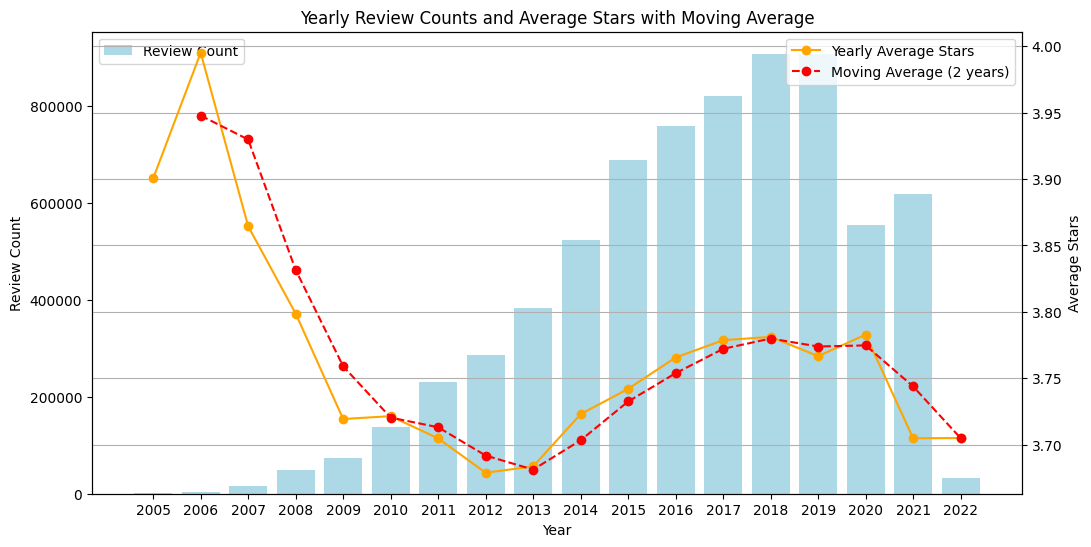

In [ ]:
# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 리뷰 개수를 막대 그래프로 표시
ax1.bar(yearly_review_counts['year'], yearly_review_counts['review_count'], color='lightblue', label='Review Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Review Count')
ax1.legend(loc='upper left')

# 평점 이동 평균을 선 그래프로 표시 (두 번째 Y축 사용)
ax2 = ax1.twinx()
ax2.plot(yearly_avg_stars['year'], yearly_avg_stars['stars'], marker='o', color='orange', label='Yearly Average Stars')
ax2.plot(yearly_avg_stars['year'], yearly_avg_stars['moving_avg'], marker='o', linestyle='--', color='red', label='Moving Average (2 years)')
ax2.set_ylabel('Average Stars')
ax2.legend(loc='upper right')

# # x축 눈금 설정
ax1.set_xticks(yearly_review_counts['year'])
ax1.set_xticklabels(yearly_review_counts['year'])

plt.title('Yearly Review Counts and Average Stars with Moving Average')
plt.grid(True)
plt.show()

##### 리뷰 수가 가장 많은 10개의 business_id에 대한 시각화

In [ ]:

# 상위 10개 가게를 리뷰 개수 기준으로 선택
top_businesses = merged_biz_rev_df['business_id'].value_counts().nlargest(10).index

# 상위 10개 가게의 데이터 필터링
top_biz_df = merged_biz_rev_df[merged_biz_rev_df['business_id'].isin(top_businesses)]


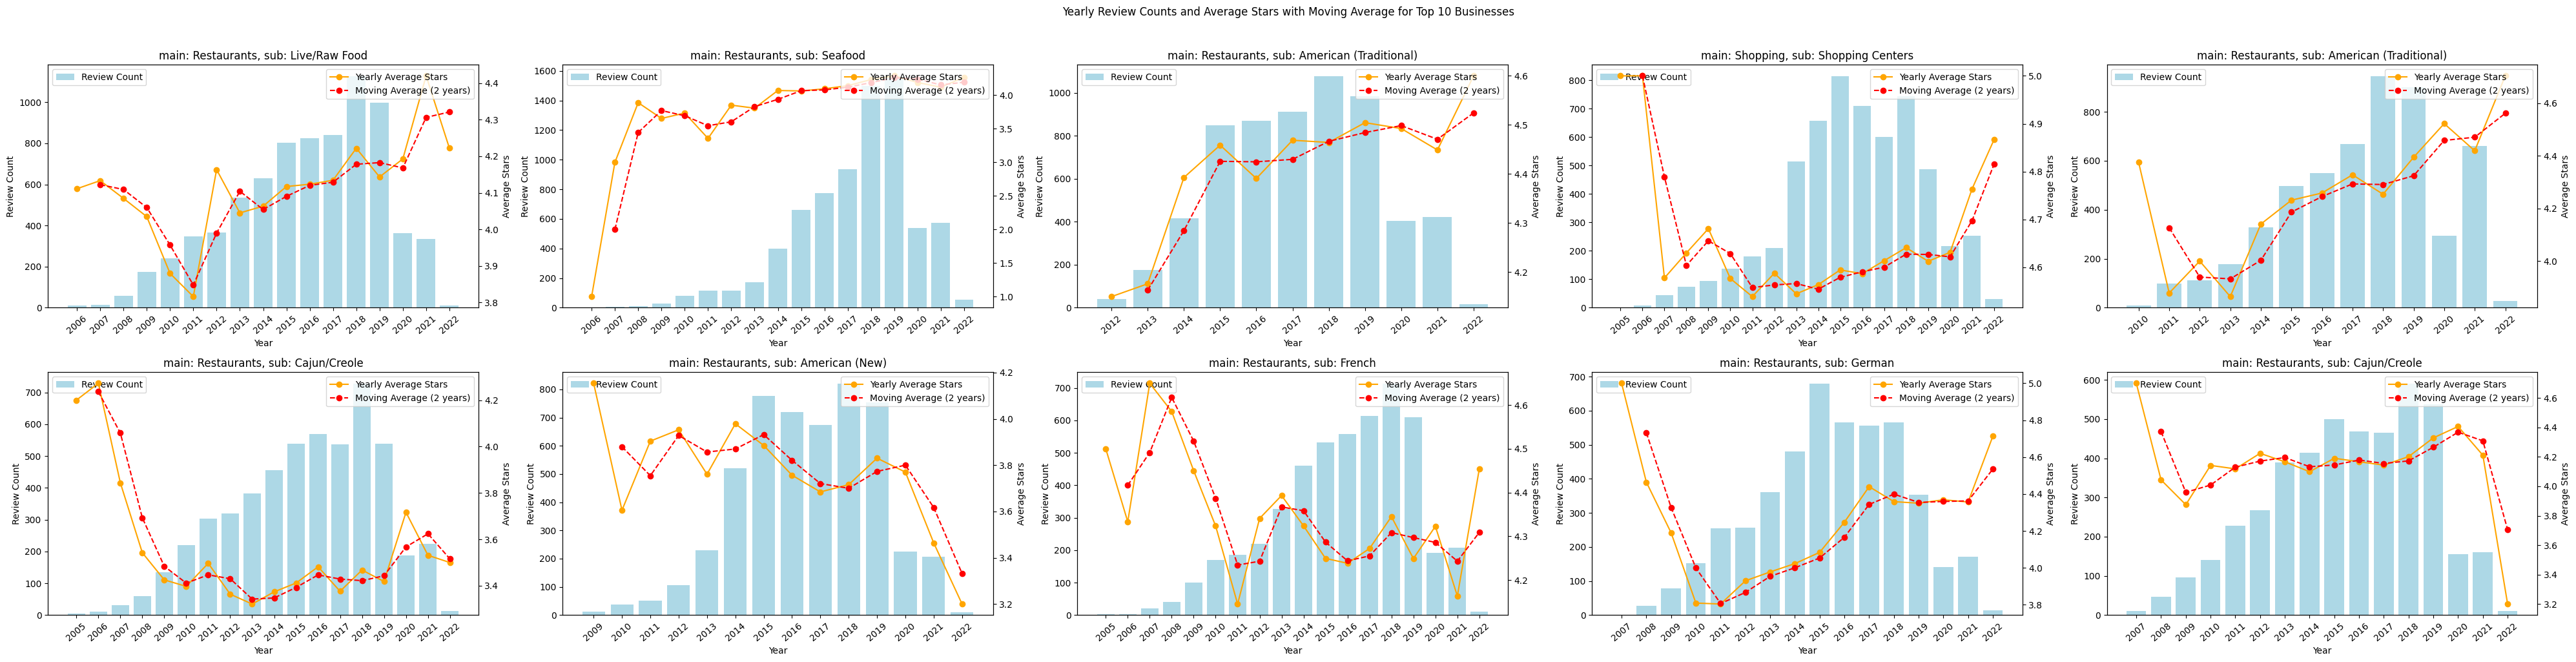

In [ ]:
# 상위 10개 가게 각각에 대해 그래프 그리기
fig, axs = plt.subplots(2, 5, figsize=(40, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, business_id in enumerate(top_businesses):
    business_df = top_biz_df[top_biz_df['business_id'] == business_id]

    # 각 연도별 리뷰 개수 계산
    yearly_review_counts = business_df.groupby(['year']).size().reset_index(name='review_count')
    yearly_review_counts['year'] = yearly_review_counts['year'].astype(int)  # 연도를 정수형으로 변환

    # 각 연도별 평점 평균 계산
    yearly_avg_stars = business_df.groupby(['year'])['stars'].mean().reset_index()
    yearly_avg_stars['year'] = yearly_avg_stars['year'].astype(int)  # 연도를 정수형으로 변환

    # 이동 평균 계산 (2년 이동 평균)
    yearly_avg_stars['moving_avg'] = yearly_avg_stars['stars'].rolling(window=2).mean()

    ax1 = axs[i // 5, i % 5]

    # 리뷰 개수를 막대 그래프로 표시
    ax1.bar(yearly_review_counts['year'], yearly_review_counts['review_count'], color='lightblue', label='Review Count')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Review Count')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(yearly_avg_stars['year'], yearly_avg_stars['stars'], marker='o', color='orange', label='Yearly Average Stars')
    ax2.plot(yearly_avg_stars['year'], yearly_avg_stars['moving_avg'], marker='o', linestyle='--', color='red', label='Moving Average (2 years)')
    ax2.set_ylabel('Average Stars')
    ax2.legend(loc='upper right')

    main_category_biz = business_df['main_category_biz'].iloc[0]
    sub_category_biz = business_df['sub_category_biz'].iloc[0]

    ax1.set_title(f'main: {main_category_biz}, sub: {sub_category_biz}')

    # x축 눈금 설정
    ax1.set_xticks(yearly_review_counts['year'])
    ax1.set_xticklabels(yearly_review_counts['year'], rotation=40)

plt.suptitle('Yearly Review Counts and Average Stars with Moving Average for Top 10 Businesses', y=1.02)
plt.tight_layout()
plt.show()

### 새로운 EDA. hyper localization, 비즈니스 주소를 기준으로 유저가 많이가는 장소를 찾아보자..

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
